In [ ]:
Dear Participant,

Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com. 

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/).

 

Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

 

Please do the analysis based on steps( 1 to 8) as given below  using a NEW python notebook:

Steps -

Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
Build Popularity Recommender model.
Build Collaborative Filtering model.
Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
Summarise your insights.
 

Please Note - 

If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.
If you are stuck at the model evaluation part of this project.
Please refer to below links - 

https://surprise.readthedocs.io/en/stable/accuracy.html (Links to an external site.)Links to an external site.
http://surpriselib.com/ (Links to an external site.)Links to an external site. - Getting started, example

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [57]:
columns_names=["user_id","product_id","rating","time_stamp"]
amazon_df=pd.read_csv("ratings_Electronics.csv",names=columns_names)

### Read and explore the dataset. ( Rename column, plot histograms, find data characteristics)

In [59]:
amazon_df.head(10)

,user_id,product_id,rating,time_stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [60]:
amazon_df.shape

(7824482, 4)

In [133]:
# Check the number of rows and columns
rows, columns = amazon_df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  7824482
No of columns:  4


In [134]:
# Check for missing values present
print('Number of missing values across columns-\n', amazon_df.isnull().sum())

Number of missing values across columns-
 user_id       0
product_id    0
rating        0
time_stamp    0
dtype: int64


F:\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


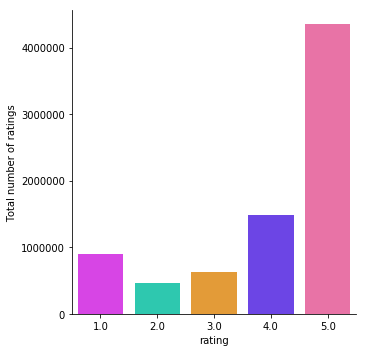

In [135]:
# Check the distribution of ratings 
g = sns.factorplot("rating", data=amazon_df, kind='count')
g.set_ylabels("Total number of ratings") 

In [137]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', amazon_df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', amazon_df['product_id'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


### Take subset of dataset to make it less sparse/more dense. ( For example, keep the users only who has given 50 or more number of ratings )

In [61]:
user_counts=amazon_df["user_id"].value_counts()

In [62]:
df_user_counts = pd.DataFrame(user_counts)
df_user_counts = df_user_counts.reset_index()
df_user_counts.columns = ['user_id', 'counts']

In [63]:
user_counts_50=df_user_counts[df_user_counts["counts"]>50]

In [64]:
amazon_new_df=amazon_df[amazon_df["user_id"].isin(user_counts_50["user_id"])]

In [65]:
amazon_new_df=amazon_new_df.drop("time_stamp",axis=1)

In [66]:
# amazon_new_df has users  who have rated 50 or more items

(122171, 3)

In [16]:
amazon_new_df.reset_index(inplace=True)

In [17]:
amazon_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122171 entries, 0 to 122170
Data columns (total 4 columns):
index         122171 non-null int64
user_id       122171 non-null object
product_id    122171 non-null object
rating        122171 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
# Q3. Split the data randomly into train and test dataset. ( For example split it in 70/30 ratio)
#splitted the data indivisually for each model

### item popularity recommender model

In [111]:
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation
from sklearn.model_selection import train_test_split

In [113]:
pop_df=amazon_new_df.copy()
pop_df = pop_df.drop_duplicates()

In [114]:
items = pop_df['product_id'].unique()
len(items)

47155

In [115]:
users = pop_df['user_id'].unique()
len(users)

1466

In [117]:
train_data, test_data = train_test_split(pop_df, test_size = 0.30, random_state=0)

In [118]:
pop_model =  Recommenders.popularity_recommender_py()
pop_model.create(train_data, 'user_id', 'product_id')

In [119]:
user_id = users[97]
pop_model.recommend(user_id)

,user_id,product_id,score,Rank
30197,A2HXEJXEQQTM1D,B0088CJT4U,150,1.0
19162,A2HXEJXEQQTM1D,B003ES5ZUU,130,2.0
8448,A2HXEJXEQQTM1D,B000N99BBC,112,3.0
29619,A2HXEJXEQQTM1D,B007WTAJTO,104,4.0
29901,A2HXEJXEQQTM1D,B00829TIEK,104,5.0
29897,A2HXEJXEQQTM1D,B00829THK0,94,6.0
16945,A2HXEJXEQQTM1D,B002R5AM7C,85,7.0
22207,A2HXEJXEQQTM1D,B004CLYEDC,83,8.0
30455,A2HXEJXEQQTM1D,B008DWCRQW,82,9.0
17122,A2HXEJXEQQTM1D,B002SZEOLG,79,10.0


In [120]:
user_id = users[150]
pop_model.recommend(user_id)

,user_id,product_id,score,Rank
30197,AAW7X3GRD8GY9,B0088CJT4U,150,1.0
19162,AAW7X3GRD8GY9,B003ES5ZUU,130,2.0
8448,AAW7X3GRD8GY9,B000N99BBC,112,3.0
29619,AAW7X3GRD8GY9,B007WTAJTO,104,4.0
29901,AAW7X3GRD8GY9,B00829TIEK,104,5.0
29897,AAW7X3GRD8GY9,B00829THK0,94,6.0
16945,AAW7X3GRD8GY9,B002R5AM7C,85,7.0
22207,AAW7X3GRD8GY9,B004CLYEDC,83,8.0
30455,AAW7X3GRD8GY9,B008DWCRQW,82,9.0
17122,AAW7X3GRD8GY9,B002SZEOLG,79,10.0


In [ ]:
## Observations 
# Since this is a popularity-based recommender model, recommendations remain the same for all users
# We predict the products based on the popularity. It is not personalized to particular user

### item similarity recommender model

In [121]:
simi_df=amazon_new_df.copy()
simi_df = simi_df.drop_duplicates()

In [122]:
train_data, test_data = train_test_split(simi_df, test_size = 0.30, random_state=0)

In [123]:
sim_model = Recommenders.item_similarity_recommender_py()
sim_model.create(train_data, 'user_id', 'product_id')

In [47]:
#personalized model to recommed some products
user_id = users[97]

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend items for the user using personalized model
sim_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A2HXEJXEQQTM1D:
------------------------------------------------------------------------------------
B001I4HF8W
B004F3CWK4
B0023Y9EQC
B003A9LH28
B00005RZOZ
B005GSNLBQ
B006JWMOOI
B0067G0YR0
B001TUYTZM
B00870KNNE
B001RIYOBK
B004AGX4YO
B00007FGUF
B002FFG6JC
B000NUBY0C
B000BTL0OA
B007X4PUGU
B005UE894U
B00CPGYNV4
B004PGMFG2
B004PXYENW
B0040IG1A6
B00744R7YW
B006EDQVQ4
B00000J1U8
B003LHSY6G
B002ALQ60U
B000TFQ5HI
B00CBE17JG
B000FQ2JLW
B005FOVA3M
B0036VO2BI
B000F7857S
B001CIREXA
B000YK1JAG
B004NT8Z2E
B00C537BQ6
B000I21YDM
B00DSVS4QU
B007P4VOWC
B004W81AI2
B0086D1ER6
B004DXZ1MC
B000V7AF8E
B00182CIB8
B001U3Y6AQ
B000ADKTRG
B003V70LYE
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique products for the user: 48
no. of unique products in t

,user_id,product_id,score,rank
0,A2HXEJXEQQTM1D,B000ELSXFY,0.012153,1
1,A2HXEJXEQQTM1D,B003CGOTJW,0.012153,2
2,A2HXEJXEQQTM1D,B0026IBJNQ,0.012153,3
3,A2HXEJXEQQTM1D,B0015IQPUU,0.010417,4
4,A2HXEJXEQQTM1D,B004GTN0T4,0.010417,5
5,A2HXEJXEQQTM1D,B004I4MZSO,0.010417,6
6,A2HXEJXEQQTM1D,B003ZWPRUI,0.010417,7
7,A2HXEJXEQQTM1D,B009F1J4R0,0.010417,8
8,A2HXEJXEQQTM1D,B000N5220I,0.010417,9
9,A2HXEJXEQQTM1D,B001EVY5Y6,0.010417,10


In [48]:
#personalized model to recommed some products
user_id = users[150]

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend items for the user using personalized model
sim_model.recommend(user_id)

----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique products for the user: 43
no. of unique products in the training set: 37385
Non zero values in cooccurence_matrix :17987


,user_id,product_id,score,rank
0,AAW7X3GRD8GY9,B00C7EN5U4,0.016888,1
1,AAW7X3GRD8GY9,B00CRJVZOM,0.016888,2
2,AAW7X3GRD8GY9,B00CRNRSLW,0.016888,3
3,AAW7X3GRD8GY9,B00CZIQZ40,0.016888,4
4,AAW7X3GRD8GY9,B004NBZAES,0.016888,5
5,AAW7X3GRD8GY9,B005NB8PRG,0.016888,6
6,AAW7X3GRD8GY9,B00B1R8JT0,0.016888,7
7,AAW7X3GRD8GY9,B003JME1CO,0.016888,8
8,AAW7X3GRD8GY9,B008PQAE98,0.016888,9
9,AAW7X3GRD8GY9,B00607JLWU,0.016888,10


### collaberative filtering using Surprise package

In [53]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [67]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
coll_data = Dataset.load_from_df(amazon_new_df, reader)

In [68]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(coll_data, test_size=0.3,random_state=123)

In [69]:
#here number of items are more than number of number users 
#the similarity measure between user u and user v in this case.
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [72]:
# we can now query for specific predicions
userid = str(196)  # raw user id
itemid = str(302)  # raw item id

In [73]:
# get a prediction for specific users and items.
pred = algo.predict(userid, itemid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [74]:
#  evaluate on the trainset
print("User-based Model : Training Set")
train_pred = algo.test(trainset.build_testset())
accuracy.rmse(train_pred)

User-based Model : Training Set
RMSE: 0.0175


0.01753591449723026

In [75]:
#  evaluate on the testset
# run the trained model against the testset
test_pred = algo.test(testset)
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0575


1.0574562914112937

In [ ]:
# now we can indivisually recommend for indivisual userids 

In [77]:
test_pred[120]

Prediction(uid='A1TQZUSOU22E9M', iid='B000NOEDGK', r_ui=5.0, est=4.680412371134021, details={'actual_k': 0, 'was_impossible': False})

In [78]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
1,A2MCRCK1V61FWQ,B0042RUSY0,5.0,4.263824,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A1Z7U9K6X3FEOU,B00845RYXE,4.0,4.263824,"{'was_impossible': True, 'reason': 'User and/o...",True
7,A24P4E3RJ6AX94,B00007FH6F,1.0,4.263824,"{'was_impossible': True, 'reason': 'User and/o...",True
9,A1EXGL6L0QQ0M5,B004HB2X4O,3.0,4.263824,"{'was_impossible': True, 'reason': 'User and/o...",True
10,A1LHMSY3Q46PJS,B000F1SFLA,5.0,4.263824,"{'was_impossible': True, 'reason': 'User and/o...",True


In [84]:
import recmetrics

In [104]:
test = test_pred_df.copy()
test.drop({"details","was_impossible"}, inplace=True, axis=1)
test.columns = ['user_id', 'product_id', 'actual', 'cf_predictions']
test.head()

,user_id,product_id,actual,cf_predictions
0,A2NT3W1F1XYBFZ,B002LITT56,5.0,4.578947
1,A2MCRCK1V61FWQ,B0042RUSY0,5.0,4.263824
2,AOWF9T81XMX2S,B0002LEMWE,5.0,4.327586
3,A1Z7U9K6X3FEOU,B00845RYXE,4.0,4.263824
4,A200DY76VXVGP9,B009CP99GK,4.0,4.970588


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36652 entries, 0 to 36651
Data columns (total 4 columns):
user_id           36652 non-null object
product_id        36652 non-null object
actual            36652 non-null float64
cf_predictions    36652 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


In [106]:
print("MSE -", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE -", recmetrics.rmse(test.actual, test.cf_predictions))

MSE - 1.1182138082453268
RMSE - 1.0574562914112937


In [107]:
colfil_model = test.pivot_table(index='user_id', columns='product_id', values='cf_predictions').fillna(0)
colfil_model.head(10)

product_id,0594481813,0972683275,1400501466,1400501520,1400532620,1400532655,1400599997,787988002X,9043413585,9575871979,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00L43HAY6,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10H24TDLK2VDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10NMELR4KX0J6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10O7THJ2O20AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

product_id
0594481813    0.002046
0970407998    0.003411
0972683275    0.010232
1400501466    0.010232
1400501520    0.003411
dtype: float64

In [108]:
def get_users_predictions(userId, n, model):
    recommended_items = pd.DataFrame(model.loc[userId])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [109]:
# Get example prediction
get_users_predictions('A2XRMQA6PJ5ZJ8', 10, colfil_model)

['B0054YQO5C',
 'B000TG4BA0',
 'B002SGATH8',
 'B0097BEFYA',
 'B0044DEDC0',
 'B000HGIWN4',
 'B004WK3U9W',
 'B000JMJWV2',
 'B001SEL36M',
 'B0018O9JIG']

### Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [110]:
#for collabarative filtering
test = test.copy().groupby('user_id')['product_id'].agg({'actual': (lambda x: list(set(x)))})
# make recommendations for all members in the test data
recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, colfil_model)
    recs.append(cf_predictions)
        
test['cf_predictions'] = recs
test.head()

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,actual,cf_predictions
user_id,,
A100UD67AHFODS,"[B006X2HIR2, B008PU665A, B00ALNPM2C, B001JIBOL...","[B001A5FH9S, B004I5BUSO, B005OA3BSY, B002HZW7C..."
A100WO06OQR8BQ,"[B00BGGDVOO, B000WKY2MK, B005HTIWF4, B0011VJRH...","[B000VX6XL6, B0009YJXMS, B007K3SB6K, B001XURGT..."
A105S56ODHGJEK,"[B000UHE8Y2, B001NTFATI, B00F36Y9XU, B004R9OVE...","[B000N99BBC, B00AZFMORW, B00AR95FOU, B0054CFKQ..."
A105TOJ6LTVMBG,"[B001KB6Z2U, B0006HBBF0, B000TXK9KE, B0002VAQR...","[B000TXK9KE, B0044BSS6Y, B001UNM414, B000I4RFO..."
A10AFVU66A79Y1,"[B00452V1ZW, B001JIBOLQ, B003DKL57G, B003B48UQ...","[B00EUFP39E, B002V88HFE, B000VJWJW2, B00INNP5V..."


In [124]:
# make recommendations for all members in the test data based on popularity based approach
popularity_recs = pop_df.product_id.value_counts().head(10).index.tolist()

recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['pop_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions
user_id,,,
A100UD67AHFODS,"[B006X2HIR2, B008PU665A, B00ALNPM2C, B001JIBOL...","[B001A5FH9S, B004I5BUSO, B005OA3BSY, B002HZW7C...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A100WO06OQR8BQ,"[B00BGGDVOO, B000WKY2MK, B005HTIWF4, B0011VJRH...","[B000VX6XL6, B0009YJXMS, B007K3SB6K, B001XURGT...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A105S56ODHGJEK,"[B000UHE8Y2, B001NTFATI, B00F36Y9XU, B004R9OVE...","[B000N99BBC, B00AZFMORW, B00AR95FOU, B0054CFKQ...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A105TOJ6LTVMBG,"[B001KB6Z2U, B0006HBBF0, B000TXK9KE, B0002VAQR...","[B000TXK9KE, B0044BSS6Y, B001UNM414, B000I4RFO...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A10AFVU66A79Y1,"[B00452V1ZW, B001JIBOLQ, B003DKL57G, B003B48UQ...","[B00EUFP39E, B002V88HFE, B000VJWJW2, B00INNP5V...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."


In [125]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()

In [126]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.001590099405312478,
 0.0025376034772658113,
 0.0032108174056595024,
 0.0035312404900279537,
 0.0037367166564530223,
 0.00394298335553086,
 0.004145051975675662,
 0.004321533052363018,
 0.004516731673860202,
 0.004663373214970316]

In [127]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.04843485982544904,
 0.09686971965089808,
 0.14530457947634712,
 0.19373943930179616,
 0.24217429912724517,
 0.29060915895269424,
 0.3390440187781433,
 0.3872839848207039,
 0.4350976207131965,
 0.48253229647229506]

In [129]:
catalog = amazon_new_df.product_id.unique().tolist()
pop_coverage = recmetrics.coverage(pop_predictions, catalog)
cf_coverage = recmetrics.coverage(cf_predictions, catalog)

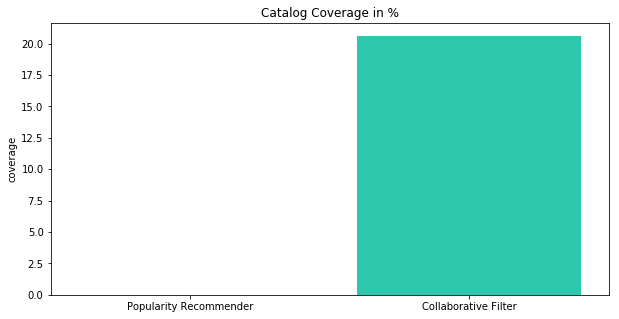

In [131]:
coverage_scores = [ pop_coverage, cf_coverage]
model_names = ['Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(10, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

### Summarise your insights.

In [ ]:
# Model-based Collaborative Filtering is a personalised recommender system

# The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts

# The Popularity based model has recommended the same set of 5 products to all users
# The Collaborative Filtering based model has recommended different list for esch user based on the user past purchase history